In [97]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [98]:
iris = load_iris()

In [99]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
variety = iris.target

In [100]:
data.drop(['petal length (cm)', 'petal width (cm)'], axis=1, inplace=True)

In [101]:
# Признаки
data.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [102]:
# Целевая переменная
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Модель LDA

In [103]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, variety, test_size=0.25)

In [104]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [105]:
lda = LinearDiscriminantAnalysis()

In [106]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [107]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 2, 0, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1, 1, 2, 0,
       0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2])

In [108]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [109]:
result

,0,1
0,0,0
1,2,2
2,0,0
3,2,2
4,1,2
5,0,0
6,2,2
7,1,1
8,2,2
9,0,0


In [110]:
# расчет точности
from sklearn.metrics import accuracy_score

In [111]:
accuracy_score(y_test, lda.predict(X_test))

0.8947368421052632

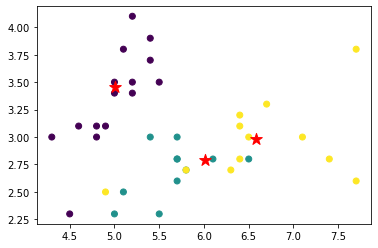

In [138]:
# scatter plot
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

## k means

In [113]:
X = data

In [114]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [115]:
scaler = StandardScaler()

In [116]:
# обучаем и преобразуем данные
X_scaled = scaler.fit_transform(X)

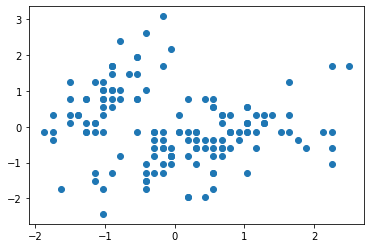

In [130]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])

In [118]:
from sklearn.cluster import KMeans

In [119]:
# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

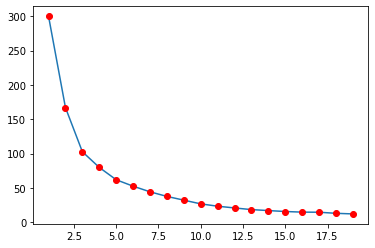

In [132]:
# график "локтя"
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [121]:
# выбирааем количество кластеров
kmeans = KMeans(n_clusters=3)
# обучаемся на данных и каждому объекту присваиваем кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

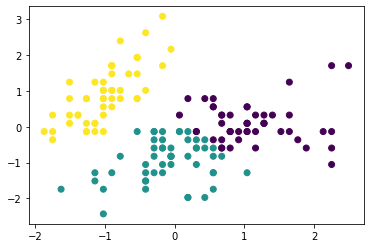

In [134]:
# визуализация кластеров
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)